In [150]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
 
from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений



In [151]:
data = pd.read_excel("data/data_ford_price.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


In [152]:
data[~data['size'].isna()]

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


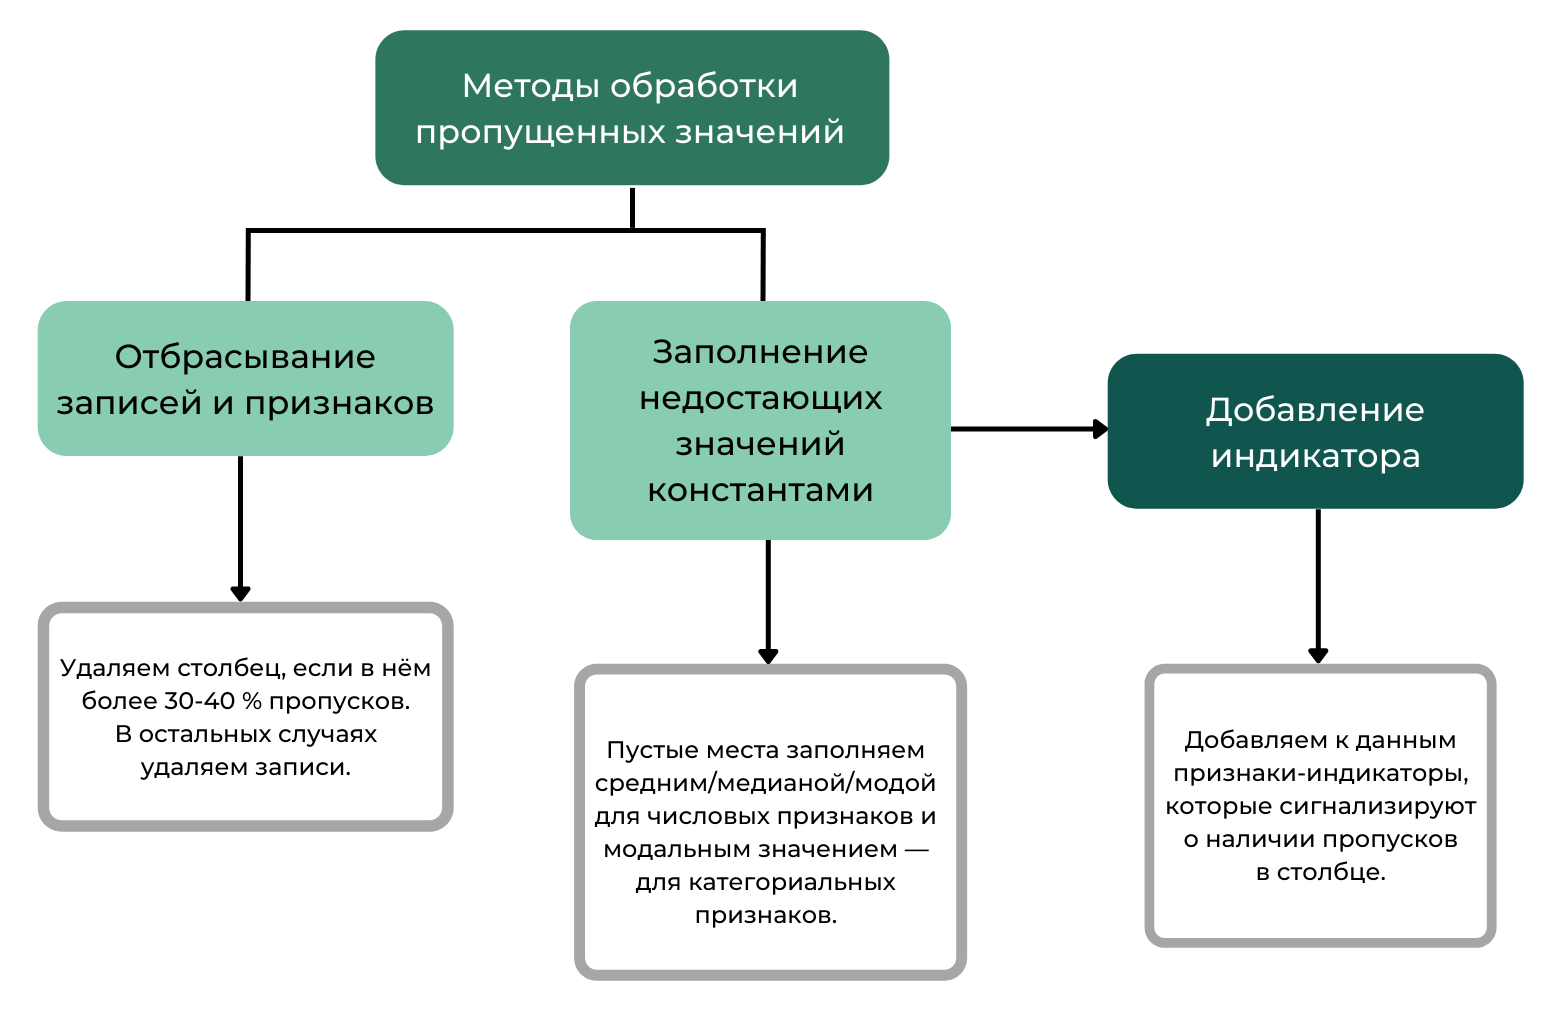

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

y = data['price']
x = data.drop(columns='price')

In [154]:
x = x.dropna()

Мы удалили некоторые строки из таблицы x. Соответственно, надо сделать то же самое в целевой переменной y.

Выберем все оставшиеся индексы таблицы x с помощью метода index(), а затем используем .iloc[], чтобы получить подгруппу целевых значений, соответствующую полученным индексам.

In [155]:
y = y.iloc[x.index]

In [156]:
x.shape[0] == y.shape[0]

True

разделим данные на тестовую и тренировачну с соотношением 20/80

In [157]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [158]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
def encode_cat_features(columns_to_change, X_train, X_test, y_train):
    one_hot_encoder = OneHotEncoder()
    X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
    X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

    columns = one_hot_encoder.get_feature_names_out(columns_to_change)
    
    X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
    X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

    X_train = X_train.reset_index().drop(['index'], axis = 1)
    X_test = X_test.reset_index().drop(['index'], axis = 1)
    y_train = y_train.reset_index().drop(['index'], axis = 1)

    X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
    X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)
    
    X_train_new = X_train_new.drop(columns=columns_to_change)
    X_test_new = X_test_new.drop(columns=columns_to_change)

    return X_train_new, X_test_new

In [159]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
#Проведём кодирование OneHot-методом категориальных переменных.

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
#Обучаем энкодер и сразу применяем преобразование к выборке. Результат переводим в массив:

X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
#Затем применяем полученное преобразование к тестовой выборке. Результат переводим в массив:

X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()
#Для удобства сохраним полученные названия новых колонок в отдельную переменную:

columns = one_hot_encoder.get_feature_names_out(columns_to_change)
columns[:10]

X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

Переустановим индексацию в таблицах, применив подряд сразу два метода: reset_index() — для изменения индексов с рандомных на последовательные от 0 до n и drop(['index'], axis = 1) — для удаления образовавшегося столбца 'index'.


In [160]:

X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1)
 
y_train = y_train.reset_index().drop(['index'], axis = 1)
y_test = y_test.reset_index().drop(['index'], axis = 1)

In [161]:
X_train.head()


,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,2001,1,8,143000,clean,automatic,4wd,full-size,43.117200,-88.344600,45.0
1,2013,3,8,142245,clean,automatic,4wd,full-size,35.887189,-78.265568,56.0
2,2016,3,6,9470,clean,automatic,4wd,mid-size,43.758910,-87.753580,45.0
3,2009,2,8,188000,clean,automatic,4wd,full-size,30.520244,-89.647288,61.0
4,2009,3,8,110516,clean,automatic,4wd,mid-size,43.781240,-88.502650,45.0


Объединяем таблицы и удаляем старые категориальные признаки:

In [162]:
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)
 
X_train_new = X_train_new.drop(columns=columns_to_change)
X_test_new = X_test_new.drop(columns=columns_to_change)

In [163]:
X_train_new, X_test_new = encode_cat_features(columns_to_change, X_train, X_test, y_train)

In [164]:
lr_model = LinearRegression() #объевляем клас линейной регресии

lr_model.fit(X_train_new,y_train) # обучаем модельна тренировочной выборке

y_train_predict = lr_model.predict(X_train_new) #делаем предсказание для тренировной выборки

y_test_predict = lr_model.predict(X_test_new)#делаем предсказание для тестовой выборки

print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

Train R^2: 0.647
Test R^2: 0.693


In [165]:
y = data['price']
x = data.drop(columns='price')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [166]:
import numpy as np
 
X_train['weather'] = X_train['weather'].fillna(np.round(np.mean(X_train['weather']),0))
X_test['weather'] = X_test['weather'].fillna(np.round(np.mean(X_train['weather']),0))

Для простоты воспользуемся заполнением наиболее частым значением категориальных признаков. Для этого сначала определим их в наших признаках, использовав комбинацию методов value_counts() и head():

In [167]:
X_train["drive"].value_counts(True).head(1)

4wd    0.738406
Name: drive, dtype: float64

In [168]:
X_train['size'].value_counts(True).head(1)

full-size    0.841164
Name: size, dtype: float64

In [169]:
X_train["drive"] = X_train["drive"].fillna("4wd")
X_train["size"] = X_train["size"].fillna("full-size")

X_test["drive"] = X_test["drive"].fillna("4wd")
X_test["size"] = X_test["size"].fillna("full-size")

In [170]:
X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
#Затем применяем полученное преобразование к тестовой выборке. Результат переводим в массив:

X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()
#Для удобства сохраним полученные названия новых колонок в отдельную переменную:

columns = one_hot_encoder.get_feature_names_out(columns_to_change)
columns[:10]

X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

In [171]:
X_train_new, X_test_new = encode_cat_features(columns_to_change, X_train, X_test, y_train)

In [172]:
lr_model = LinearRegression()
lr_model.fit(X_train_new, y_train)
y_train_predict = lr_model.predict(X_train_new)
y_test_predict = lr_model.predict(X_test_new)
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

Train R^2: 0.649
Test R^2: 0.465


In [173]:
# Импортируем необходимые модули
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Скопируем данные в отдельную переменную
data = x.copy()
 
# В качестве тестовой выборки возьмем строки с пропусками в признаке weather
test_data = data[data['weather'].isnull()]
# И удалим эти строчки из таблицы
data.dropna(inplace=True)

# Определим целевой признак и факторы
y_train = data['weather']
X_train = data.drop(['size','weather','drive'], axis=1)
X_test = test_data.drop(['size','weather','drive'], axis=1)

# Создадим кодировщик
one_hot_encoder = OneHotEncoder()
categorial_cols = ['cylinders', 'title_status', 'transmission']

# Закодируем категориальные признаки (обучаем кодировщик только на тренировочной выборке)
X_train_onehot = one_hot_encoder.fit_transform(X_train[categorial_cols]).toarray()
X_test_onehot = one_hot_encoder.transform(X_test[categorial_cols]).toarray()

# Результаты преобразуем обратно в DataFrame для удобства
columns = one_hot_encoder.get_feature_names_out(categorial_cols)
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

# Сбросим индексы таблиц
X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1)
y_train = y_train.reset_index().drop(['index'], axis = 1)

# Добавим результаты кодирования к исходным таблицам
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)

# Удалим столбцы, которые уже были закодированы
X_train_new = X_train_new.drop(columns=categorial_cols)
X_test_new = X_test_new.drop(columns=categorial_cols)

# Создадим модель линейной регрессии и обучим ее на задачу предсказания пропусков
model = LinearRegression()
model.fit(X_train_new, y_train)

# Сделаем предсказание целевой переменной (пропущенных значений в признаке weather) 
y_pred = model.predict(X_test_new)

In [174]:
y_pred

array([[ 40.91435555],
       [ 40.7637233 ],
       [ 39.74866152],
       [ 41.2755305 ],
       [ 40.31791932],
       [ 41.10796547],
       [ 41.15337846],
       [ 39.94866488],
       [ 41.10796547],
       [ 40.7217165 ],
       [ 40.18904454],
       [ 91.62094167],
       [ 41.12549856],
       [ 41.33052316],
       [ 39.66827354],
       [ 40.91435555],
       [ 40.77287826],
       [ 40.84208674],
       [ 41.10796547],
       [ 41.02118034],
       [ 40.31791932],
       [ 41.30309209],
       [ 40.77645269],
       [ 40.75842615],
       [ 40.61605044],
       [ 40.79031628],
       [ 40.7701239 ],
       [ 39.78723017],
       [ 41.27231621],
       [ 39.77492057],
       [ 40.7637233 ],
       [ 40.7701239 ],
       [ 41.10796547],
       [ 39.68313064],
       [ 40.12277414],
       [ 39.7873657 ],
       [ 41.07798631],
       [ 41.06812063],
       [ 40.7637233 ],
       [ 40.90194049],
       [ 41.10796547],
       [ 70.85737739],
       [ 30.44339508],
       [ 40